In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Dataset/wine_dataset.csv')
df

,Class_label,Alcohol,Malic_Acid
0,3,11.06,1.85
1,1,14.73,1.89
2,3,13.00,2.29
3,3,13.16,2.42
4,1,13.74,4.10
...,...,...,...
495,2,12.84,2.37
496,2,13.23,4.31
497,1,14.44,3.33
498,2,13.14,3.81


<Axes: xlabel='Alcohol', ylabel='Density'>

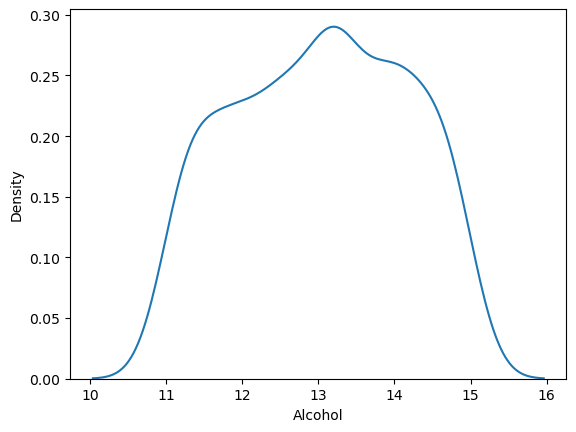

In [6]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic_Acid', ylabel='Density'>

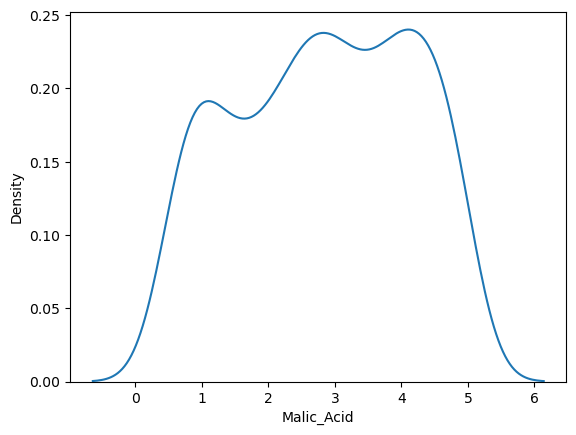

In [8]:
sns.kdeplot(df['Malic_Acid'])

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

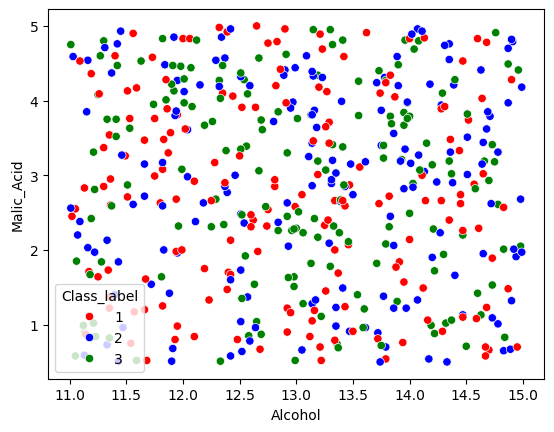

In [22]:
color_dict = {1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x = df['Alcohol'], y =df['Malic_Acid'], hue = df['Class_label'], palette = color_dict)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class_label', axis = 1), 
                                                   df['Class_label'],
                                                   test_size = 0.3,
                                                   random_state = 0)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [36]:
np.round(X_train.describe(), 1)

,Alcohol,Malic_Acid
count,350.0,350.0
mean,13.0,2.8
std,1.1,1.3
min,11.0,0.5
25%,12.1,1.7
50%,13.1,2.9
75%,14.0,4.0
max,15.0,5.0


In [38]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic_Acid
count,350.0,350.0
mean,0.5,0.5
std,0.3,0.3
min,0.0,0.0
25%,0.3,0.3
50%,0.5,0.5
75%,0.7,0.8
max,1.0,1.0


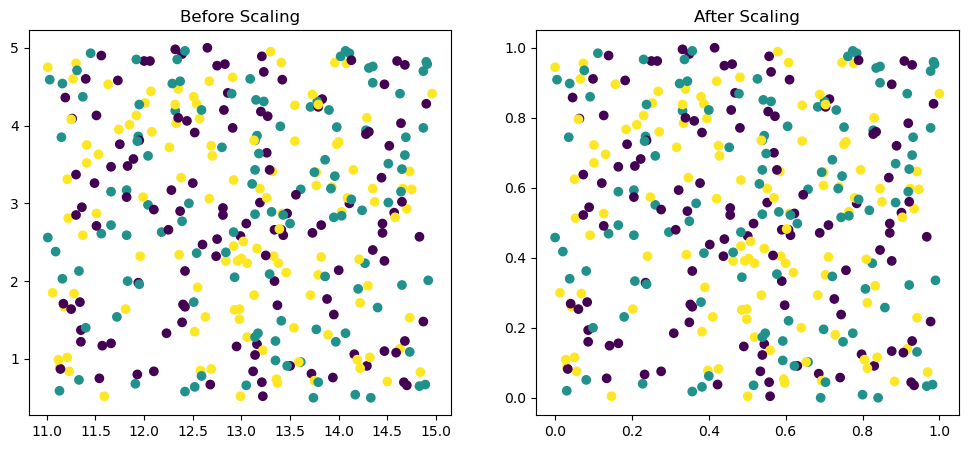

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic_Acid'], c =y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic_Acid'], c =y_train)
ax2.set_title('After Scaling')
plt.show()

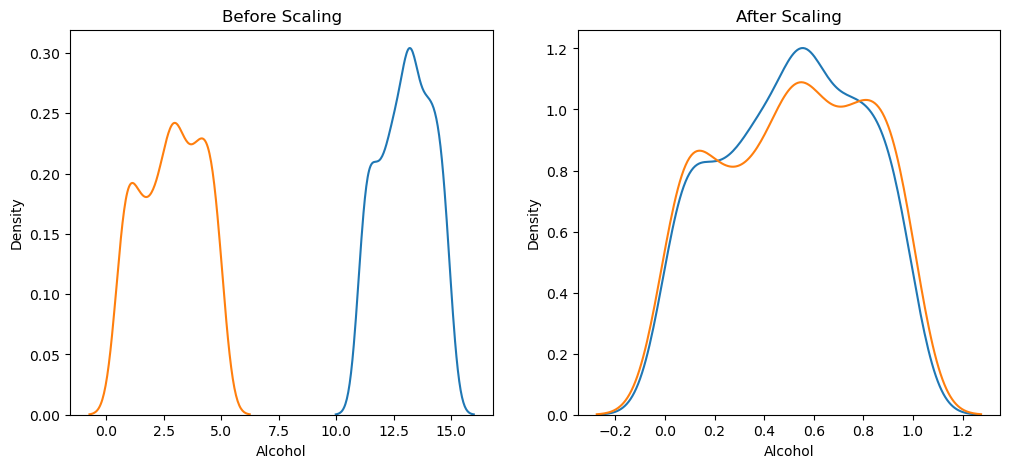

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic_Acid'], ax = ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic_Acid'], ax = ax2)
plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

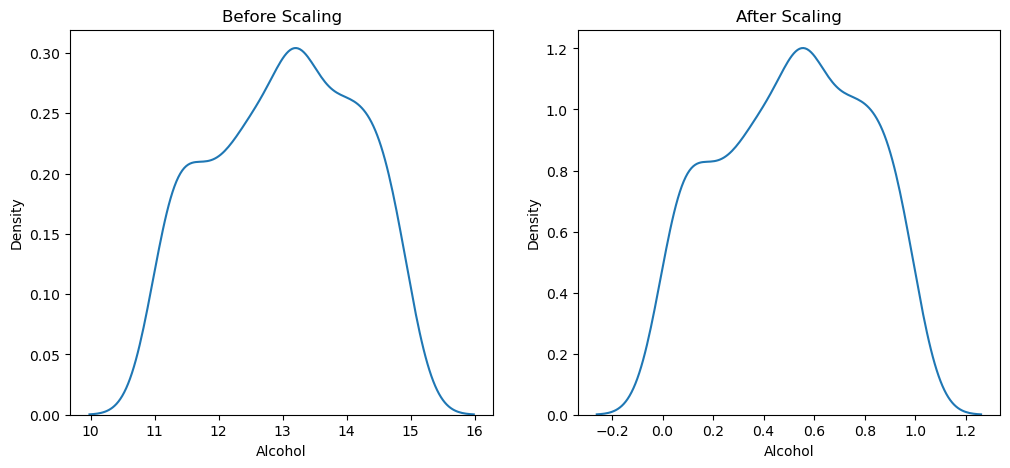

In [66]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)

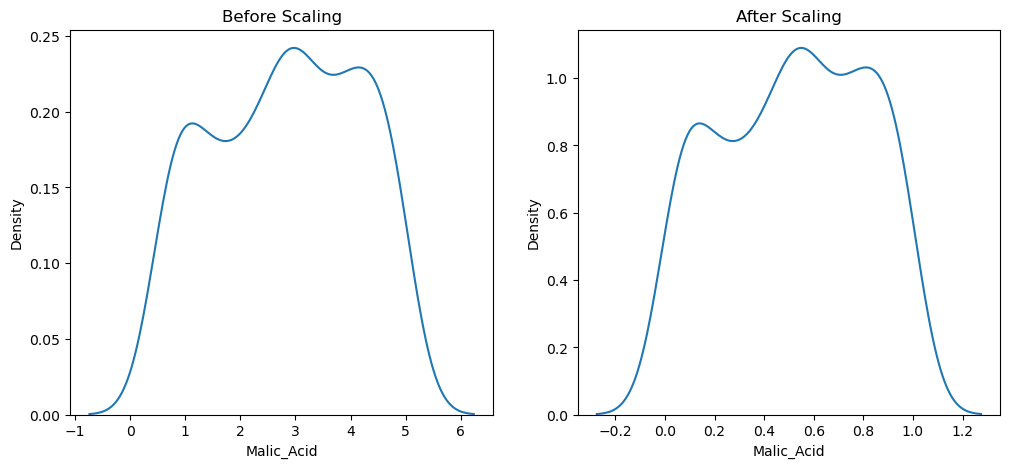

In [68]:
fig, (ax3, ax4) = plt.subplots(ncols = 2, figsize = (12, 5))

ax3.set_title('Before Scaling')
sns.kdeplot(X_train['Malic_Acid'], ax = ax3)
ax4.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Malic_Acid'], ax = ax4)
plt.show()